# VERİ SETİ HİKAYESİ
### Veri Kümesine Genel Bakış

Health_fitness_dataset, 3.000 katılımcının 2024 yılına ait günlük gerçek sağlık ve fitness izleme verilerini içermektedir. Bu veri kümesi günlük aktiviteleri, önemli sağlık göstergelerini ve yaşam tarzı faktörlerini yakalar ve sağlık analizi ve tahmine dayalı modelleme için büyük değere sahiptir.

**PROJENİN KONUSU**

3000 kişilik bir kitlenin günlük spor aktiviteleri ve güncel sağlık durumlarını içeren 687701 tane verisi mevcuttur. Bu veriyi baz alarak amaç;

Gözetimli öğrenme ile yeni gelen kullanıcının girmiş olduğu bilgilere göre; 1 gün içerisinde yaptığı spor ve mevcut sağlık durumuna göre fitness_level hesaplamaktır.Gözetimli öğrenme ile ilgili çalışmama https://www.kaggle.com/code/zdengltekin/health-and-fitness-supervised/ link üzerinden ulaşabilirsiniz. Buna ek olarak projenin tamamını görüntülemek için https://github.com/ozdengultekin/Health_and_Fitness_Project  github linkinde erişip kodları inceleyebilirsiniz.

Gözetimsiz öğrenme ile mevcut veri setindeki kişilerin günlük sağlık ve spor alışkanlıklarının benzerliklerine göre; yeni kullanıcının hangi gruba dahil olacağını tespit etmektir.

**PROJENİN AMACI**

Temel amaç, mevcut veri setindeki  kişilerin günlük  sağlık ve spor alışkanlıklarının benzerliklerine göre; yeni kullanıcının hangi gruba dahil olacağını bulmaktır.

Gözetimli Öğrenme ile eğittiğimiz veri setini kullanarak başlıyoruz. Bu veri seti 11 sütun ve 687701 satırdan oluşmaktadır. 3000 kişilik spor ve sağlık verilerini içermektedir. Günlük olarak yapılan spor aktivitelerine göre kişilerin sağlık seviyesi hesaplanmaktadır.
**Gözetimsiz Öğrenme nedir?**

Gözetimsiz Öğrenme  veri hiçbir zaman etiketli bir değişken içeremez. Çünkü gözetimsiz Öğrenmede temel amaç,  benzer örüntülere sahip spor ve sağlık bilgilerine sahip olan kişileri, gruplara bölmek ve benzer olanları aynı gruba dahil etmektir. Bu nedenle Gözetimsiz Öğrenme de etiketli bir veri olmaz.

Gözetimsiz Öğrenme  yöntemlerinden k-ortalamalar Kümelemesi kullanılacaktır. Ancak elimizde çok fazla gözlem noktası var. Bu da veriyi modelimizde eğitirken zaman, gpu açısından maliyete sebep olacaktır.
Aşağıda da belirttiğim üzere burada veri setinde mantıklı bir sadeleştirmeye gidilmiştir.

Projenin bu kısmında yeni gelen kişiden  stress_level, endurance_level,age, endurance_heart_ratio
avg_heart_rate,height_cm ve heart_rate_reserve değişkenlerle ilgili ortalama değerlerini girmesini bekliyoruz. Böylece yeni gelen kişinin mevcut veri setinde hangi gruba dahil olacağını belirliyor olacağız.

**K-ortalamalar  Kümelemesi** öncesi veri setimize **IQR ve MinMaxScaler** yöntemleri uygulanmıştır. Ayrıca optimum küme sayısını bulabilmek için **elbow(dirsek)** yöntemi kullanılmıştır.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.cluster import Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/health-and-fitness-dataset/health_fitness_dataset.csv')

df["endurance_heart_ratio"] = df["avg_heart_rate"] / (df["endurance_level"] + 1)
df["heart_rate_reserve"] = df["avg_heart_rate"] - df["resting_heart_rate"]

df =df[["participant_id","duration_minutes", "endurance_level", "daily_steps","age", "height_cm", "weight_kg", "stress_level", "hydration_level","endurance_heart_ratio","avg_heart_rate","heart_rate_reserve","fitness_level","sleep_hours"]]


VERİ SETİNİN SADELEŞTİRİLMESİ

Bu aşamada 3000 lik verideki kişilerin her sütundaki değişkenlerinin ortalaması alınarak veri seti daha küçük hale getirilmştir. K-means kümelemesinde amaç, benzer sağlık ve spor bilgileri olan kişileri gruplamaktı. O nedenle bu şekilde bir veri sadeleştirmesine gidiyoruz.



In [3]:
df = df.groupby('participant_id', as_index=False).mean()
df.head()

,participant_id,duration_minutes,endurance_level,daily_steps,age,height_cm,weight_kg,stress_level,hydration_level,endurance_heart_ratio,avg_heart_rate,heart_rate_reserve,fitness_level,sleep_hours
0,1,74.948927,8.361030,8794.184549,56.0,165.3,53.564979,5.596567,2.496996,13.397106,120.768240,51.268240,9.558112,7.025322
1,2,75.361983,10.612645,8632.057851,40.0,177.6,74.703223,5.516529,2.534298,11.719110,132.561983,50.461983,10.160744,6.986364
2,3,79.172247,9.404141,8501.088106,23.0,158.4,51.257004,5.599119,2.518502,14.363799,145.286344,77.286344,9.627445,6.990308
3,4,66.669362,9.892638,8416.489362,37.0,167.2,67.934851,5.544681,2.487234,12.765285,135.565957,74.865957,9.848511,7.057021
4,5,71.305727,11.553348,8592.722467,50.0,172.0,55.805463,5.290749,2.540529,10.179510,125.325991,55.125991,9.516784,7.098238


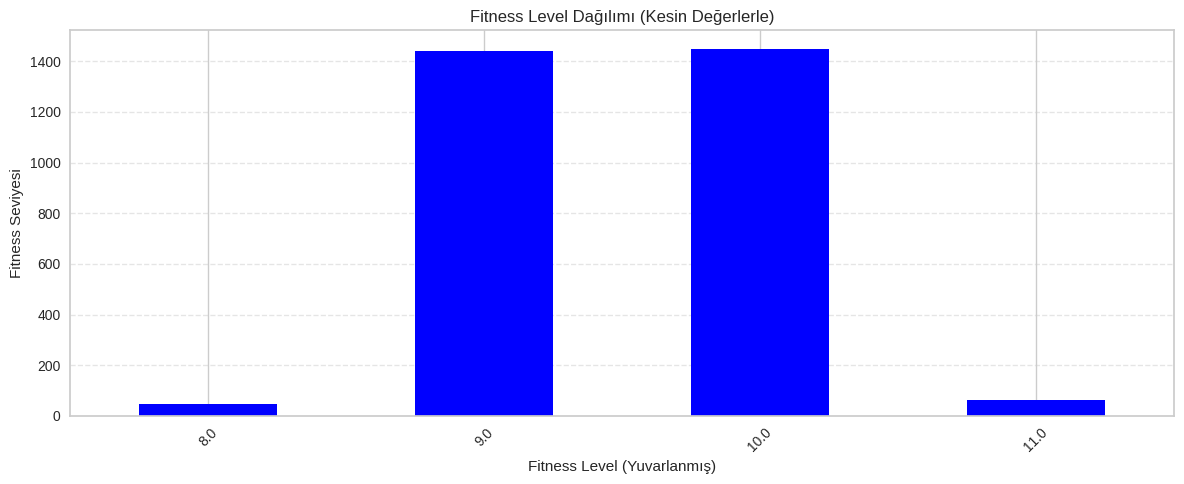

In [4]:
df['fitness_level_rounded'] = df['fitness_level'].round()

# Her değerin kaç kez geçtiğini say ve sırala
counts = df['fitness_level_rounded'].value_counts().sort_index()

# Grafik çizimi
plt.figure(figsize=(12, 5))
counts.plot(kind='bar', color='blue')

# Grafik başlık ve etiketleri
plt.title("Fitness Level Dağılımı (Kesin Değerlerle)")
plt.xlabel("Fitness Level (Yuvarlanmış)")
plt.ylabel("Fitness Seviyesi")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

fitness_level dağılımlarını görüyoruz. Gözetimsiz Öğrenmede etiketli veri olmaması gerektiğini yukarıda belirtmiştik. Bu bilgiye istinaden fitness_level bilgisini veri setimizden kaldırıyoruz. Amacımız kaç gruba böleceğimiz konusunda genel bir bilgi edinmektir.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
participant_id,3000.0,1500.500000,866.169729,1.000000,750.750000,1500.500000,2250.250000,3000.000000
duration_minutes,3000.0,74.030103,3.814666,63.847917,70.240210,75.395720,76.884464,82.235743
endurance_level,3000.0,9.485882,1.457492,7.162488,8.365405,9.299391,10.413524,15.971289
daily_steps,3000.0,8628.890379,113.468922,8250.776786,8549.875254,8628.022809,8704.950130,9043.805310
age,3000.0,41.641667,13.591548,18.000000,30.000000,42.000000,53.000000,64.000000
height_cm,3000.0,168.581233,9.142268,145.000000,161.700000,168.200000,175.300000,198.500000
weight_kg,3000.0,61.724632,8.237637,42.501709,55.823276,61.058660,67.104862,94.061574
stress_level,3000.0,5.472075,0.128857,5.017778,5.385173,5.472888,5.556021,5.909953
hydration_level,3000.0,2.499432,0.038596,2.341014,2.473436,2.499556,2.524168,2.623729
endurance_heart_ratio,3000.0,13.165957,2.145752,6.839629,11.621680,13.085116,14.709697,18.861328


**1. duration_minutes (Aktivite süresi - dakika):<br>**
Ortalama: ~74 dakika Minimum - Maksimum: 20 – 152 dakika<br>
Yorum: Ortalama aktivite süresi makul, 25% ile 75% çeyrekleri arasında geniş bir dağılım var.Uzun süreli egzersizler de mevcut.<br>
**2. endurance_level (Dayanıklılık seviyesi):<br>**
Ortalama: ~9.5 Aralık: 4.5 – 18.8<br>
Yorum: Düşük standart sapma (2.2) gösteriyor ki kullanıcıların dayanıklılık seviyeleri birbirine yakın. Normalleştirilmiş bir skor olabilir.<br>
**3. daily_steps (Günlük adım sayısı):<br>**
Ortalama: ~8628 adım Minimum - Maksimum: 17,241 – 3600   adım<br>
Yorum: Sağlık açısından önerilen minimum 7000-8000 adım civarı yakalanmış. Bazı kullanıcılar oldukça aktif.<br>
**4. age (Yaş): Ortalama: ~42 yaş Aralık: 20 – 64 yaş<br>**
Yorum: Orta yaşlı kullanıcılar yoğunlukta. Genç ve yaşlı bireyler azınlıkta.<br>
**5. height_cm (Boy - cm):<br>**
Ortalama: ~168 cm Aralık: 145 – 198.5 cm<br>
**6. weight_kg (Kilo - kg):<br>**
Ortalama: ~61.7 kg Aralık: 39.76 – 98.11 kg<br>
Yorum: Ortalama kilo oldukça düşük.<br>
**7. stress_level (Stres seviyesi):<br>**
Ortalama: ~5.47 (1–10 arasında)<br>
Yorum: Ortalama stres seviyesi orta düzeyde. Sağlıklı bir dağılım mevcut.<br>
**8. hydration_level (Hidrasyon seviyesi):<br>**
Ortalama: ~2.5 (muhtemelen 1.5 – 3.5 arasında normalize edilmiş)<br>
Yorum: Hidrasyon seviyesi verisi sınırlı aralıkta. Düşük varyanslı.<br>
**9. endurance_heart_ratio (Dayanıklılık/Kalp oranı):<br>**
Ortalama: ~13.2 Aralık: 4.8 – 34.8<br>
Yorum: Değişkenlik yüksek. Bu oran muhtemelen kondisyonla ilgili güçlü bir belirteç.<br>
**10. avg_heart_rate (Ortalama kalp atışı):<br>**
Ortalama: ~131 bpm Aralık: 82 – 206 bpm<br>
Yorum: Spor sırasında ölçülmüş ort kalp hızıdır. Kalp atım hızı efor düzeyini yansıtır.<br>
Düşük 90-100
Orta 110-140
Yüksek 140-170
max 170-200<br>
**11.heart_rate_reserve** 
Ortalama: ~131 Aralık: 30 - 90 arasında değişiyor. Değerler dengeli dağılmış ve ortalama 61 bpm civarındadır. Veri oldukça düzgün ve çarpıklık göstermiyor.Kardiyovasküler dayanıklılık göstergesidir. 

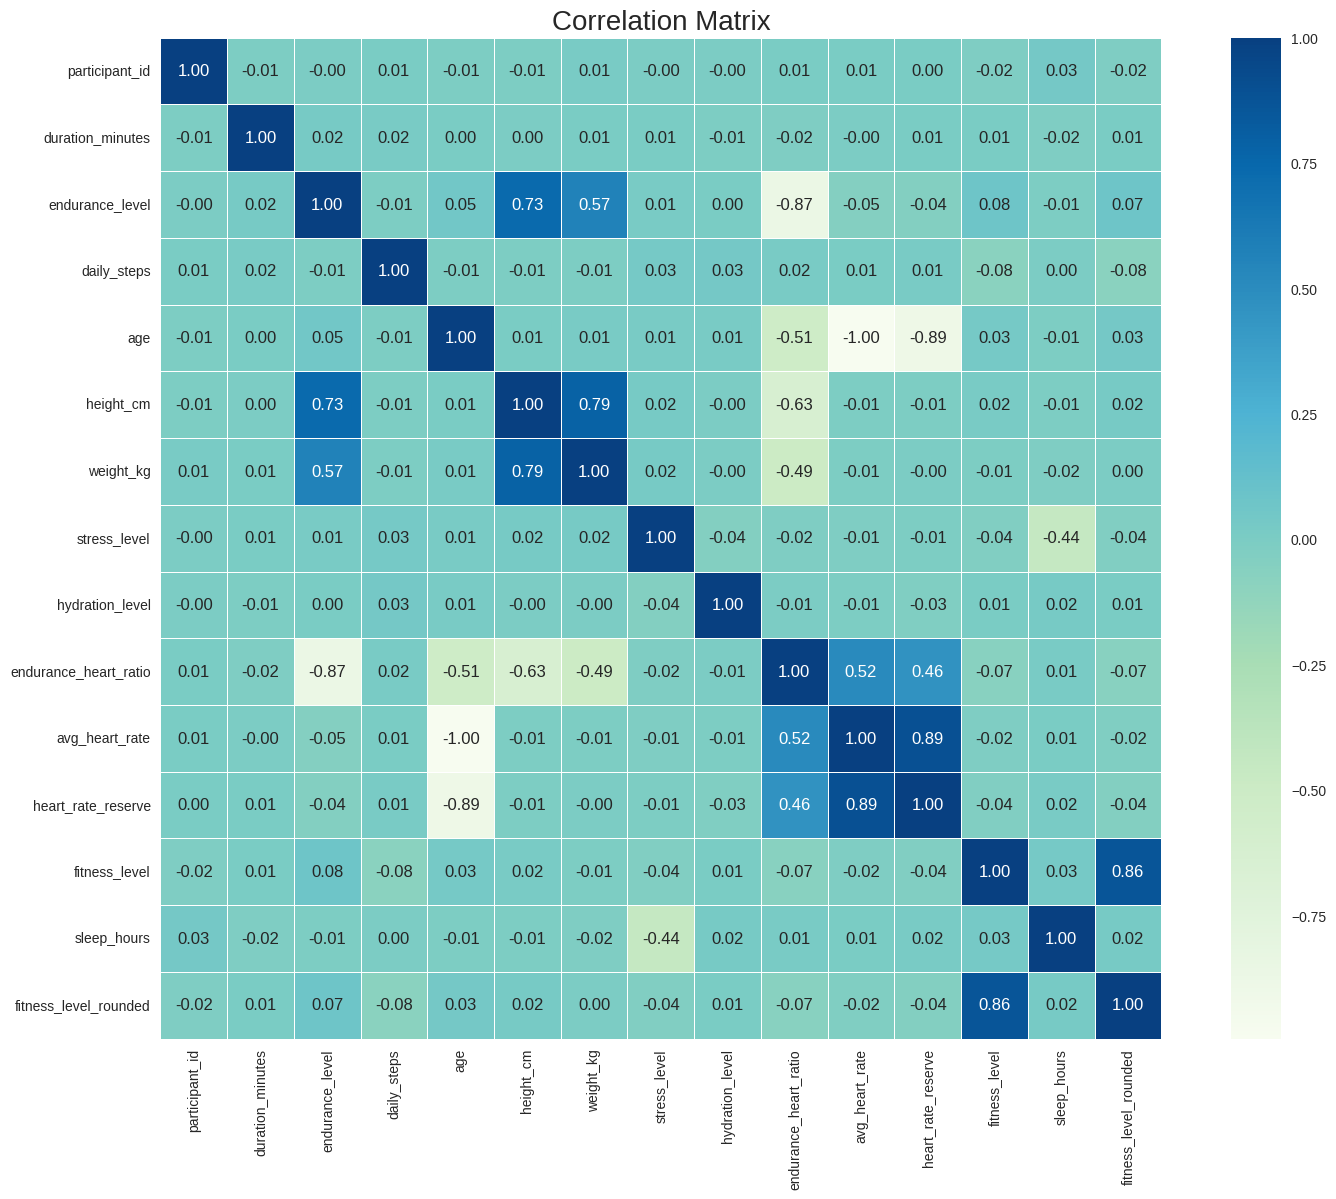

In [6]:
numeric_df = df.select_dtypes(include=['number'])

# Korelasyon matrisi
corr = numeric_df.corr()

# Grafik çizimi
plt.figure(figsize=(18, 13))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="GnBu", square=True, linewidths=0.5)
plt.title("Correlation Matrix", fontsize=20)
plt.show()

fitness_level ile en güçlü korelasyon duration_minutes,daily_steps,endurance_heart_ratio olduğu görülmektedir. Bu değişkenler dolaylı olarak seçtiğimiz diğer değişkenlerle de korelasyona sahiptir.

Bu veri setimizde sadece nümerik değişkenler mevcut. Numerik değişken demek tipi int,float olan sayısal ve sürekli değişkenlerdir. Projemin Gözetimli Öğrenme kısmında veri ön işleme, keşifçi veri analizi,özellik mühendisliği(aykırı değer, eksik değer, özellik çıkarma ve encoding) adımlarını inceleyebilirsiniz.

In [7]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
num_cols

['participant_id',
 'duration_minutes',
 'endurance_level',
 'daily_steps',
 'age',
 'height_cm',
 'weight_kg',
 'stress_level',
 'hydration_level',
 'endurance_heart_ratio',
 'avg_heart_rate',
 'heart_rate_reserve',
 'fitness_level',
 'sleep_hours',
 'fitness_level_rounded']

In [8]:
def get_outlier_bounds(df, col, q_low=0.10, q_high=0.90):
    q1 = df[col].quantile(q_low)
    q3 = df[col].quantile(q_high)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper
for col in num_cols:
    lower, upper =get_outlier_bounds(df, col)
    print(f"{col} → Lower: {lower:.2f}, Upper: {upper:.2f}")

participant_id → Lower: -3297.90, Upper: 6298.90
duration_minutes → Lower: 53.21, Upper: 92.83
endurance_level → Lower: 1.91, Upper: 17.24
daily_steps → Lower: 8038.18, Upper: 9218.50
age → Lower: -35.00, Upper: 117.00
height_cm → Lower: 121.45, Upper: 216.25
weight_kg → Lower: 19.09, Upper: 105.51
stress_level → Lower: 4.81, Upper: 6.14
hydration_level → Lower: 2.30, Upper: 2.70
endurance_heart_ratio → Lower: 1.87, Upper: 24.62
avg_heart_rate → Lower: 75.75, Upper: 187.71
heart_rate_reserve → Lower: 1.43, Upper: 121.65
fitness_level → Lower: 7.03, Upper: 12.01
sleep_hours → Lower: 6.72, Upper: 7.38
fitness_level_rounded → Lower: 7.50, Upper: 11.50


In [9]:
def has_outliers(df, col):
    lower, higher = get_outlier_bounds(df, col)
    return df[(df[col] < lower) | (df[col] > higher)].any().any()

for col in num_cols:
    if has_outliers(df, col):
        print(f"{col} değişkeninde aykırı değer var.")

Normal şartlarda, bizim veri setimizde olduğu gibi verilen aralıklarda sorun yoksa outlier(aykırı değer analizi) verinin yapısını değiştirebilir veya bozabilir. Ancak gözetimsiz öğrenmede kullanacağımız k-means kümeleme algoritması aykırı değerlerden etkilenir.Bunun nedeni mesafe temelli bir ölçeklendirmeye dayanmasıdır. İlerleyen bölümde daha detaylı bahsedilecektir. Veriyi çokta bozmamak amacıyla q-low ve q high değerlerini 0,10 ve 0,90 olarak seçtik. Seçilen bu değerlerle aykırı olan değerlerin çok az bir kısmını baskılamış olacağız.<br> Yukarıdaki fonksiyonda yaptığımız incelemede aykırı değer olmadığını görüyoruz.

In [10]:
def cap_outliers(df, col, q_low=0.10, q_high=0.90):
    lower, upper = get_outlier_bounds(df, col)
    df[col] = df[col].clip(lower, upper)

for col in num_cols:
    cap_outliers(df, col)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_id         3000 non-null   int64  
 1   duration_minutes       3000 non-null   float64
 2   endurance_level        3000 non-null   float64
 3   daily_steps            3000 non-null   float64
 4   age                    3000 non-null   float64
 5   height_cm              3000 non-null   float64
 6   weight_kg              3000 non-null   float64
 7   stress_level           3000 non-null   float64
 8   hydration_level        3000 non-null   float64
 9   endurance_heart_ratio  3000 non-null   float64
 10  avg_heart_rate         3000 non-null   float64
 11  heart_rate_reserve     3000 non-null   float64
 12  fitness_level          3000 non-null   float64
 13  sleep_hours            3000 non-null   float64
 14  fitness_level_rounded  3000 non-null   float64
dtypes: f

**K_MEANS CLUSTRING(K-ORTALAMALAR KÜMELEMESİ) ÖNCESİ STANDARTLAŞTIRMA**<br>

K-ortalamalar  kümeleme algoritmasında standartlaştırma (standardization) yapılmasının temel nedeni, özelliklerin (feature'ların) farklı ölçeklerde olması durumunda algoritmanın hatalı veya dengesiz kümeler oluşturabilmesidir.
Veriler arası benzerliği ölçmek için Öklidyen mesafe (Euclidean distance) kullanır. Eğer geniş aralığa sahip bir değişken varsa kümeleme baskın olan değişken göre yapılmış olur.

StandardScaler ve MinMaxScaler denendiğinde; MinMaxScaler dan daha iyi sonuçlar aldık. Çünkü veri aralıkları birbirinden çok farklı. O nedenle bu değerleri 0-1 arasına ölçeklemek daha iyi bir sonuç vermiştir.

In [12]:
df = df[["stress_level","endurance_level","age","endurance_heart_ratio","avg_heart_rate","height_cm","heart_rate_reserve"]]
df.info()

sc = MinMaxScaler((0,1))
df_scaled =sc.fit_transform(df)
df_scaled[0:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   stress_level           3000 non-null   float64
 1   endurance_level        3000 non-null   float64
 2   age                    3000 non-null   float64
 3   endurance_heart_ratio  3000 non-null   float64
 4   avg_heart_rate         3000 non-null   float64
 5   height_cm              3000 non-null   float64
 6   heart_rate_reserve     3000 non-null   float64
dtypes: float64(7)
memory usage: 164.2 KB


array([[0.64873916, 0.1360619 , 0.82608696, 0.54547011, 0.19532   ,
        0.37943925, 0.35009296],
       [0.55902849, 0.39167156, 0.47826087, 0.40588949, 0.49687452,
        0.60934579, 0.33701702],
       [0.65160005, 0.2544788 , 0.10869565, 0.62588242, 0.82222401,
        0.25046729, 0.77205672],
       [0.59058276, 0.3099344 , 0.41304348, 0.49291339, 0.57368321,
        0.41495327, 0.73280269],
       [0.30596147, 0.49846286, 0.69565217, 0.27782109, 0.31185725,
        0.5046729 , 0.41265828]])

Bu noktada gözetimli öğrenmede seçtiğimiz değişkenler denenmiş olup bu noktada verimli sonuçlar alınamamıştır. O nedenle farklı değişkenler denenerek son aşamada yukarıda belirttiğimiz değişkenleri modele sokmaya karar verdik. İncelemek isterseniz https://www.kaggle.com/code/zdengltekin/health-and-fitness-supervised/ linkten ulaşabilirsiniz. 

K-means algoritmasıyla standartlaşma aşamasında genellikle StandartScaler algoritması kullanıldığını görmekteyiz. Ancak mevcut veri setimizde değişkenler arasındaki değer aralıkları çok değişken olduğundan scikit-learn  kütüphanesinin  MinMaxScaler() sınıfı seçilmiştir.

**K-ORTALAMALAR KÜMELEME ANALİZİ İÇİN OPTİMUM KÜME SAYISININ BELİRLENMESİ**

K-ortalamalar kümeleme yönteminde optimum küme sayısı iki şekilde belirlenir.<br>
1.Elbow ile optimum küme sayısı otomatik olarak belirlenir.
2.Silhouette (Silüet) optimum küme sayısını grafiğe göre kendimiz seçeriz.

Bu noktada elbow yöntemi seçilmiştir.


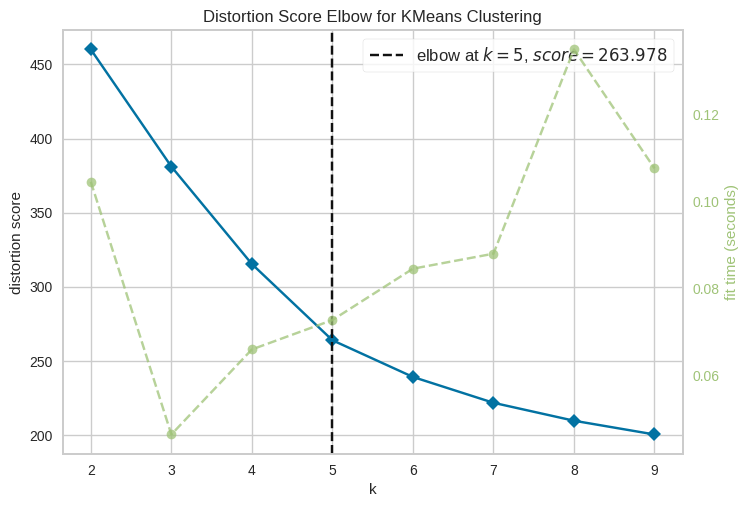

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
kmeans = KMeans()
elbow =KElbowVisualizer(kmeans, k=(2,10))
elbow.fit(df_scaled)
elbow.show()

In [14]:
optimal_k = elbow.elbow_value_
kmeans_final = KMeans(n_clusters= optimal_k ,init='k-means++',max_iter =300, random_state=42).fit(df_scaled)
clusters = kmeans_final.labels_

In [15]:

score = silhouette_score(df_scaled,kmeans_final.labels_ )

In [16]:
print("Silhouette Score:", score)

Silhouette Score: 0.2620511325283747


Silhouette skor 1 ile -1 arasında bir değer alır. Amaç yapılan kümelemenin ne kadar iyi olduğunu tespit etmektir.  Bu skorun  0.5 üzeri olması  iyi, 0.3 civarı zayıf, 0.2 ve altı kümelenme yok gibi yorumlanır.Sonucumuza baktığımızda modelimizin  gruplandırmayı zayıf bir kümeleme  yaptığı görülüyor. O nedenle başta da fitness_level incelediğimizde kümelemenin 2 olduğunu gözlemlemiştik. O nedenle optimizasyonla elde ettiğimiz bu skoru kullanmayacağız.


In [17]:
kmeans_final = KMeans(n_clusters= 2 ,init='k-means++',max_iter =300, random_state=42).fit(df_scaled)
clusters = kmeans_final.labels_

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   stress_level           3000 non-null   float64
 1   endurance_level        3000 non-null   float64
 2   age                    3000 non-null   float64
 3   endurance_heart_ratio  3000 non-null   float64
 4   avg_heart_rate         3000 non-null   float64
 5   height_cm              3000 non-null   float64
 6   heart_rate_reserve     3000 non-null   float64
dtypes: float64(7)
memory usage: 164.2 KB


In [19]:
df["cluster"] = clusters + 1

In [20]:
df.groupby("cluster").agg(["count","mean", "median"])

stress_level                     endurance_level                      \
               count      mean    median           count      mean    median   
cluster                                                                        
1               1558  5.474986  5.477973            1558  9.642499  9.463755   
2               1442  5.468929  5.468281            1442  9.316666  9.105177   

          age                   endurance_heart_ratio  ...             \
        count       mean median                 count  ...     median   
cluster                                                ...              
1        1558  52.891528   53.0                  1558  ...  12.091855   
2        1442  29.486824   30.0                  1442  ...  14.282439   

        avg_heart_rate                         height_cm                      \
                 count        mean      median     count        mean  median   
cluster                                                                        
1                 1558  123.105541  122.961121      1558  169.130295  168.80   
2                 1442  140.499411  140.374720      1442  167.988003  167.15   

        heart_rate_reserve                        
                     count       mean     median  
cluster                                           
1                     1558  52.847518  52.809733  
2                     1442  70.759327  70.659448  

[2 rows x 21 columns]

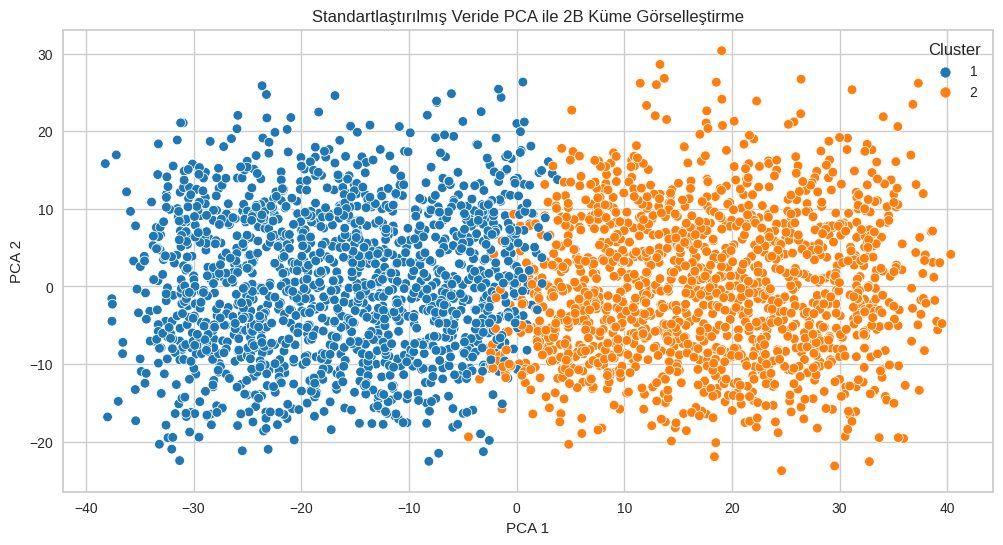

In [21]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df)

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df["cluster"], palette="tab10")
plt.title("Standartlaştırılmış Veride PCA ile 2B Küme Görselleştirme")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

PCA daha az değişken ile veri seti daha sade hale getirilir. Görselleştirme ve model performansını arttırma amacını taşır. Veriyi ortalama 0 varyans 1 olacak şekilde standartlaştırır. Burada kullanılma amacı, görselleştirme performansını arttırmaktır.

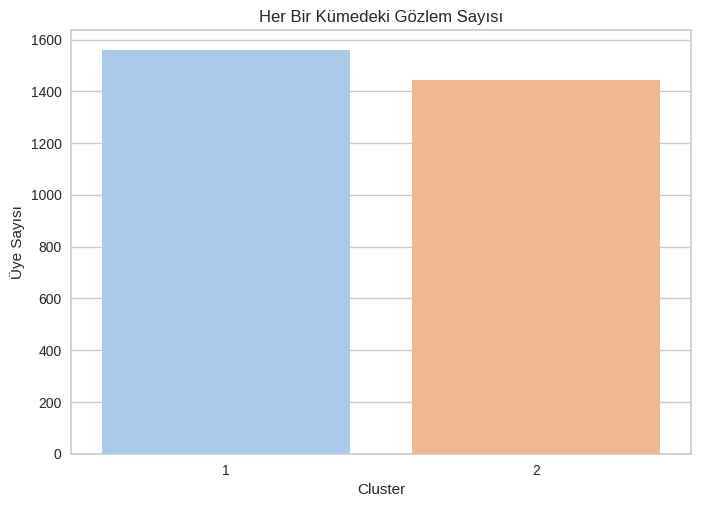

In [22]:
#3. Boxplot ile Değişken Dağılımları (Cluster Bazında)

cluster_counts = df["cluster"].value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")
plt.xlabel("Cluster")
plt.ylabel("Üye Sayısı")
plt.title("Her Bir Kümedeki Gözlem Sayısı")
plt.show()

Sonuçlar

En önemli sonuç,  mevcut veri setini ham hali ile kullandığımda modelin  iyi bir kümeleme yapamadığı gözlemlenmiştir. Ayrıca bu durum, model eğitiminin uzun sürmesi gibi sorunları ortaya çıkarmıştır. Bu nedenle veriyi hem kümelenebilir hale getirmek hem de sadeleştirmek için her kişiye ait günlük bilgilerin ortalaması  kullanılarak yeni bir veri seti oluşturulmuştur.

En başta fitness_level incelediğimizde de bu veri seti için en uygun kümeleme noktasının 2 olduğu görülmüştür.
Elbow yöntemi kullarak optimum küme sayısı belirlememize rağmen bu noktanın veri seti için aslında iyi bir değer olduğunu Silhouette skor ile belirledik.

İlerleyen aşamalar projenin başında da belirttiğim gibi proje ile ilgili bir arayüz hazırlanacaktır.

Ancak veri gruplama konusunda yetersiz gibi görünüyor. Bu nedenle veriyi arttırmak daha verimli olacaktır.
